# BLACK FRIDAY DATASET

EDA AND FEATURING ENGINEERING & PREPARE DATA FOR MODEL BUILDING

In [335]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading Dataset

In [336]:
df_train = pd.read_csv("C:\\Users\\harip\\Desktop\\Projects\\data\\blackfriday\\train.csv")
df_test = pd.read_csv("C:\\Users\\harip\\Desktop\\Projects\\data\\blackfriday\\test.csv")

In [337]:
# Shape of the data
print(f'Trian shape : {df_train.shape}, Test shape :{df_test.shape}')

Trian shape : (550068, 12), Test shape :(233599, 11)


In [338]:
# model training using this 
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [339]:
# here we dont have the output variable
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


##### Problem Statement : Understand the Cutomer Purchase behaviour (mainly Purchase amount), against various product of different categories. We have summary of various customer for selected high volume product of last month. The data set also contains customer demographics (Age, Gender, Marital Status, city_type , stay_in_current_city), Product details (product_id,product_category)and Total purchase_amount from last month

#####  Build a model to predict the purchase of customer against the product for personalized offer to the customer

Always combine the dataset so, we can perform test on both data

In [340]:
df = df_train._append(df_test)
# This joins data by rows, we can do it with merge as well 
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [341]:
df.info() # checking data types and values
# Here age is given in Range

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [342]:
round(df.describe(),2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.00,783667.00,783667.00,783667.00,537685.00,237858.00,550068.00
mean,1003029.00,8.08,0.41,5.37,9.84,12.67,9263.97
std,1727.27,6.52,0.49,3.88,5.09,4.13,5023.07
min,1000001.00,0.00,0.00,1.00,2.00,3.00,12.00
25%,1001519.00,2.00,0.00,1.00,5.00,9.00,5823.00
50%,1003075.00,7.00,0.00,5.00,9.00,14.00,8047.00
75%,1004478.00,14.00,1.00,8.00,15.00,16.00,12054.00
max,1006040.00,20.00,1.00,20.00,18.00,18.00,23961.00


In [343]:
# From this above Col we will remove  User_Id cause we have no use
df.drop('User_ID',axis=1,inplace=True)
df.head(1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0


In [344]:
# df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)
# simple 0,1 Convertion 
# https://www.educative.io/answers/what-is-the-getdummies-function-i
# df.head(3)

In [345]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


One way of converting the categorical values into Numerical

1. Handling Categorical Values of Gender
* There are three ways we can handle it 
* But it is not a good practice to use dummies 

In [346]:
# df['Gender'] = df['Gender'].replace({'F' :1, 'M' : 0}) 
# NOTE Or you can use replace
# df['Gender] = df['Gender'].map({'F' : 0, 'M' : 1})
df['Gender'] = pd.get_dummies(df['Gender'],dtype=int,drop_first=True)

In [347]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


2. Handling Categorical Values Age

In [348]:
# Because age is in Range ,so they are categorical
df.Age.unique() # array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
#df.Age.value_counts()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [349]:
# So now we can apply encoding for this as well
# pd.get_dummies(df['Age'], dtype = int ,drop_first=True) # not a good paractice, but we can use Map function

# NOTE we will use map Target Value Encoding 
df['Age'] = df['Age'].map({'0-17' : 1 , '18-25' : 2, '26-35' : 3, '36-45': 4, '46-50' : 5, '51-55' : 6, '55+' : 7}) # NOTE dont put zero
# Again lable encoding will also work , NOTE SECOND TECHNIQUE  :-> https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [350]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [351]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

While Implementing the get_dummies we can use the dtype as well , dtype = int

In [352]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True,dtype=int) # if dtype is not mentioned you will get Boolean
# Drop_first = True will drop the first column
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


Why Drop_First : If we have three category two category is sufficient to represent all the three categories

Now we combine this df_city to the main dataframe

In [353]:
df = pd.concat([df,df_city],axis=1)

In [354]:
df.drop(['City_Category','Product_ID'],axis=1,inplace=True)

In [355]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


Till now we have converted : Age,Gender,City_Category into numerical

Now we will check the missing values

TEST DATA CAN BE NULL IN OUR CASE BEFORE MERGING PURCHASE WAS IN TRAIN SO IT CAN BE NULL

In [356]:
df.isnull().sum()
# from these we can see 3 Columns with more null values 
# Test Data Can be null NOTE NOTE

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Now we have to foucs on replacing missing values for two columns Product_category_1 and Product_category_2

In [357]:
# Lets see what unique categories we have 
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [358]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

This is a discrete and not a continues because :
1. The product are known and only they repeate again and again
2. But Purchase will be continues because they may or may-not repeate 

WHAT SHOULD BE A BETTER WAY OF REPLACING THE MISSING VALUES

In [359]:
df['Product_Category_2'].value_counts()
# so we can replace by the most repeating number MODE, we cannot use mean because it will create a new category in its self 

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

Filling Na values using the mode

In [360]:
from statistics import mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode(df['Product_Category_2'])) # Here we are filling the NAN values with mode 

In [361]:
df['Product_Category_2'].isnull().sum()

0

In [362]:
# df['Product_Category_2'].value_counts()

Similarly we follow the same steps for ['Product_Category_3]

In [363]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [364]:
from statistics import mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode(df['Product_Category_3'])) # Here we are filling the NAN values with mode 

In [365]:
df['Product_Category_3'].isnull().sum()

0

In [366]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


Here we are dealing with Stay_In_Current_City_Years

In [367]:
df['Stay_In_Current_City_Years'].unique()
# So here since it is alread in numbers 
df['Stay_In_Current_City_Years'].dtype


# NOTE here mentioning the STR is important
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [368]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

NOW WE DONT HAVE ANY MORE CATEGORY

In [369]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(1)
memory usage: 62.8+ MB


##### NOW WE NEED TO CONVERT THE OBJECT TO NUMERICAL -- > So here we need to do the type convertion

In [371]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(str).astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  float64
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 62.8 MB


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  float64
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 62.8 MB


VISUALIZATION

In [373]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [374]:
# Pairplot : 5m
# sns.pairplot(df)
# plt.plot() 

In [375]:
# Bar plot on Age, Purchase
# df['Gender'] = df['Gender'].astype(str)
# i had coneverted the Gender into dtype = int 
# sns.barplot(x = 'Age', y ='Purchase', hue='Gender', data=df)

# Observation from the data we can see that male has done more shoping across varity of ages

In [376]:
df['Occupation'].nunique() # There are 21 unique occupations
# Visualizaiton of purchace over occupation

21

In [377]:
# matplotlib.rcParams['figure.figsize'] = (8,6)
# sns.barplot(x = 'Occupation', y= 'Purchase' , hue = 'Gender', data = df)

Product_cat_1

In [378]:
# sns.barplot(x = 'Product_Category_1', y= 'Purchase' , hue = 'Gender', data = df)

Product_cat_2

In [379]:
# sns.barplot(x = 'Product_Category_2', y= 'Purchase' , hue = 'Gender', data = df)

Product_cat_3

In [380]:
# sns.barplot(x = 'Product_Category_3', y= 'Purchase' , hue = 'Gender', data = df)

From all three observation we can tell people have bought product 1 the more its over 17k

[]

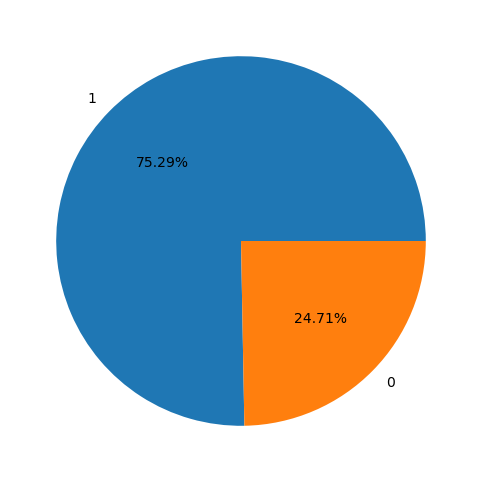

In [381]:
df['Gender'].value_counts()
gender_index = df['Gender'].value_counts().index
gender_values = df['Gender'].value_counts().values
# NOTE What is the distribution of Gender
plt.pie(x = gender_values, labels=gender_index, autopct="%.2f%%",)
plt.plot()
# The gender Ration of Male is more

In [382]:
# # df['Marital_Status'] = df['Marital_Status'].astype(str)
# sns.barplot(x = 'Product_Category_1', y= 'Purchase' , hue = 'Marital_Status', data = df)

FEATURE SCALING 

In [383]:
df_test = df[df['Purchase'].isnull()]
# where ever null is there that is our test data

In [384]:
df_train = df[~df['Purchase'].isnull()] # I am Training with Purchase not null

WE CAN EVEN DO X_TRAIN,Y_TRAIN IF WE WANT 

In [394]:
# Feature Scaling by applying Standard Scalar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df_train.drop('Purchase', axis=1)
X.shape

(550068, 10)

In [395]:
y = df_train['Purchase']
y.shape

(550068,)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33, random_state= 42)
sc = StandardScaler()

In [398]:
X_train = sc.fit_transform(X_train)

In [402]:
X_test = sc.transform(X_test)

c:\Users\harip\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Train the model - From this model